# Self-Driving Car Engineer Nanodegree
## Project: Advanced Lane Finding

## Camera Calibration 

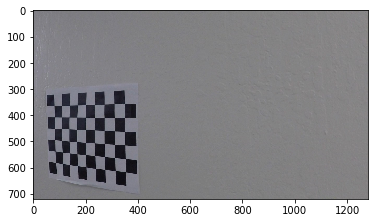

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
#%matplotlib qt

images = glob.glob('camera_cal/calibration*.jpg')
#Calibration20.jpg is taken as a test image
test_img = cv2.imread('camera_cal/testimage.jpg')
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
plt.imshow(test_img)

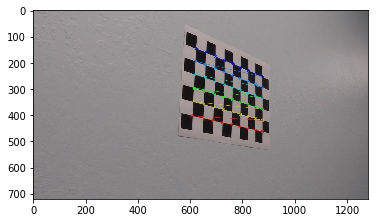

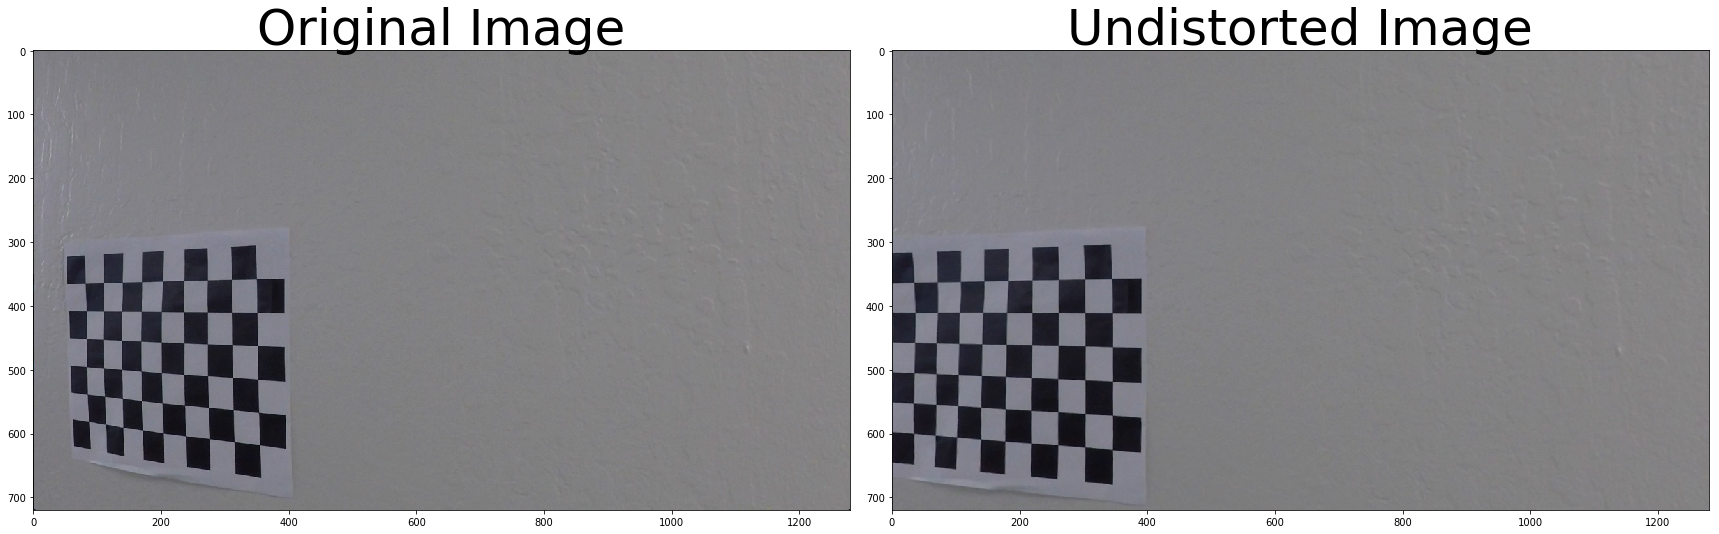

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [2]:
objpoints = []
imgpoints = []

objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)


for fname in images:
    img = cv2.imread(fname)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)


    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
    
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #plt.figure()
        plt.imshow(img)


ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None, None)


udist = cv2.undistort(test_img, mtx, dist, None, mtx)


f, (ax1, ax2) = plt.subplots(1,2, figsize=(24,9))
f.tight_layout()
plt.figure()
ax1.imshow(test_img)
ax1.set_title('Original Image', fontsize=50)
plt.figure()
ax2.imshow(udist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


### Image Undistortion Function

In [3]:
def undistort(dist_img):
    undist = cv2.undistort(dist_img, mtx, dist, None, mtx)
    return undist


### Perspective Transform

In [4]:
# Warped image function

def warp(img):
    src = np.float32([(720,470),(1010,660),(297,660),(560,470)])
    dst = np.float32([(1000,100),(1000,720),(300,720),(300,100)])
    img_size = (img.shape[1],img.shape[0])
    M = cv2.getPerspectiveTransform(src,dst)
    Minv = cv2.getPerspectiveTransform(dst,src)
    
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped, M, Minv


### Perpective transform visualization

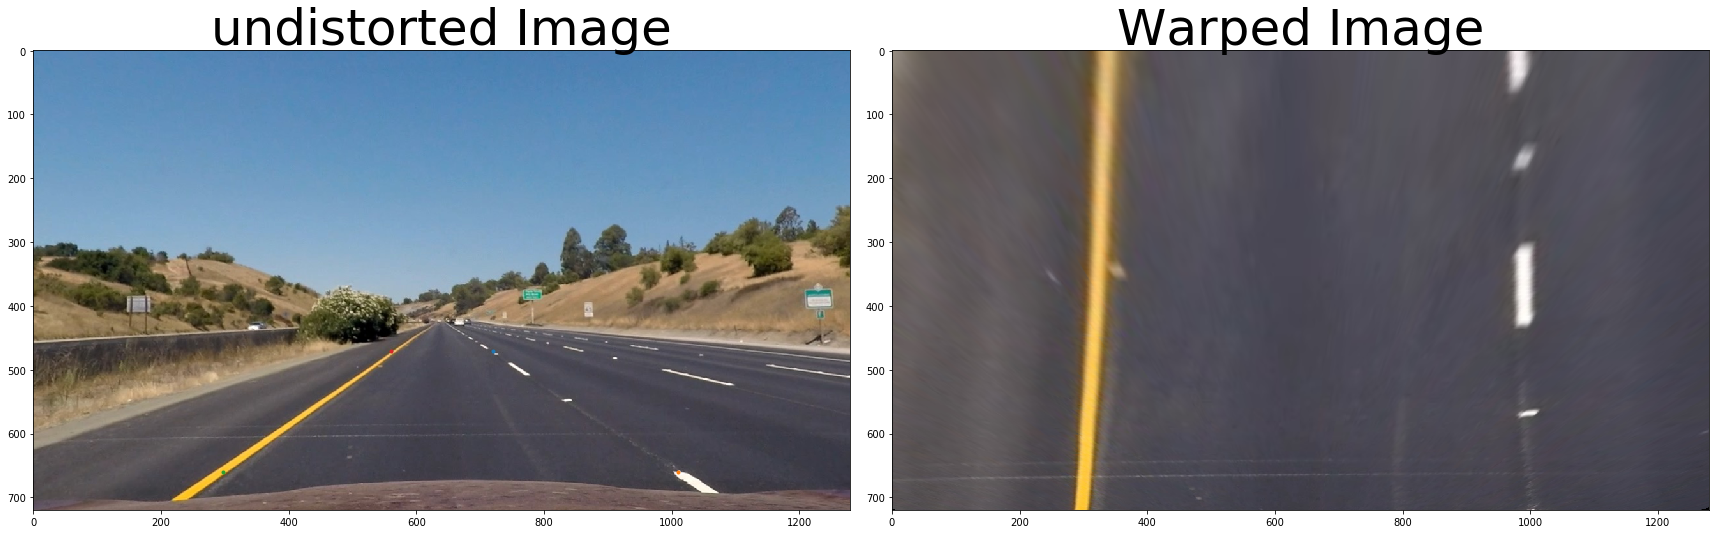

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [5]:
ex_img = cv2.imread('test_images/straight_lines1.jpg')
ex_img = cv2.cvtColor(ex_img,cv2.COLOR_BGR2RGB)

udist_ex_img = undistort(ex_img)

h,w = udist_ex_img.shape[:2]

warp_ex_img, M, Minv = warp(udist_ex_img)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(24,9))
f.tight_layout()
plt.figure()
ax1.imshow(udist_ex_img)
ax1.plot(720,470,'.')
ax1.plot(1010,660,'.')
ax1.plot(297,660,'.')
ax1.plot(560,470,'.')
ax1.set_title('undistorted Image', fontsize=50)
plt.figure()
ax2.imshow(warp_ex_img)
ax2.set_title('Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Text(0.5,1,'HSV V-Channel')

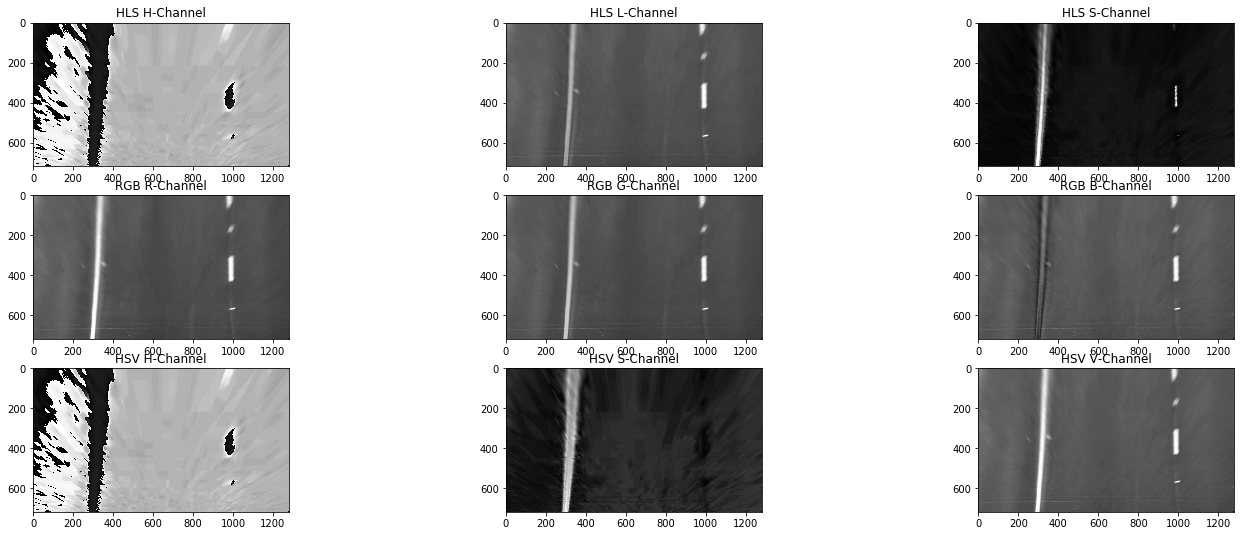

In [6]:
warp_ex_img_HLS = cv2.cvtColor(warp_ex_img,cv2.COLOR_RGB2HLS)
warp_ex_img_H = warp_ex_img_HLS[:,:,0]
warp_ex_img_L = warp_ex_img_HLS[:,:,1]
warp_ex_img_S = warp_ex_img_HLS[:,:,2]

warp_ex_img_R = warp_ex_img[:,:,0]
warp_ex_img_G = warp_ex_img[:,:,1]
warp_ex_img_B = warp_ex_img[:,:,2]

warp_ex_img_HSV = cv2.cvtColor(warp_ex_img,cv2.COLOR_RGB2HSV)
warp_ex_img_HSV_H = warp_ex_img_HSV[:,:,0]
warp_ex_img_HSV_S = warp_ex_img_HSV[:,:,1]
warp_ex_img_HSV_V = warp_ex_img_HSV[:,:,2]

f, axs = plt.subplots(3,3, figsize =(24,9))

axs = axs.ravel()

axs[0].imshow(warp_ex_img_H, cmap='gray')
axs[0].set_title('HLS H-Channel')
axs[1].imshow(warp_ex_img_L, cmap='gray')
axs[1].set_title('HLS L-Channel')
axs[2].imshow(warp_ex_img_S, cmap='gray')
axs[2].set_title('HLS S-Channel')
axs[3].imshow(warp_ex_img_R, cmap='gray')
axs[3].set_title('RGB R-Channel')
axs[4].imshow(warp_ex_img_G, cmap='gray')
axs[4].set_title('RGB G-Channel')
axs[5].imshow(warp_ex_img_B, cmap='gray')
axs[5].set_title('RGB B-Channel')
axs[6].imshow(warp_ex_img_HSV_H, cmap='gray')
axs[6].set_title('HSV H-Channel')
axs[7].imshow(warp_ex_img_HSV_S, cmap='gray')
axs[7].set_title('HSV S-Channel')
axs[8].imshow(warp_ex_img_HSV_V, cmap='gray')
axs[8].set_title('HSV V-Channel')

## Applying Sobel

### Sobel absolute threshold

In [7]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F,1,0)
    elif orient == 'y': 
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
        
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel>=thresh_min) & (scaled_sobel<=thresh_max)] = 1
    
    return sxbinary

### Sobel Magnitude threshold

In [8]:
def mag_thresh(img, sobel_kernel, mag_thresh):
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F,1,0)
    sobely = cv2.Sobel(gray, cv2.CV_64F,0,1)
    # Calculate the magnitude 
    abs_sobelxy = np.sqrt(sobelx**2 + sobely**2)
    scaled_sobel = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel>= min(mag_thresh)) & (scaled_sobel<= max(mag_thresh))] = 1
    
    return sxbinary

### Sobel Direction threshold

In [9]:
def dir_threshold(img, sobel_kernel, thresh):
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F,1,0, ksize = sobel_kernel)
    abs_sobelx = np.absolute(sobelx)
    sobely = cv2.Sobel(gray, cv2.CV_64F,0,1, ksize = sobel_kernel)
    abs_sobely = np.absolute(sobely)
    # np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient
    dirct = np.arctan2(abs_sobely,abs_sobelx)
    binary_output =  np.zeros_like(dirct)
    binary_output[(dirct >= thresh[0]) & (dirct <= thresh[1])] = 1
    
    return binary_output

## Color threshold

In [10]:
def hls_select(img,thresh=(170,255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel>=thresh[0])&(s_channel<=thresh[1])]=1
    return s_binary



### Visualizing combined threshold

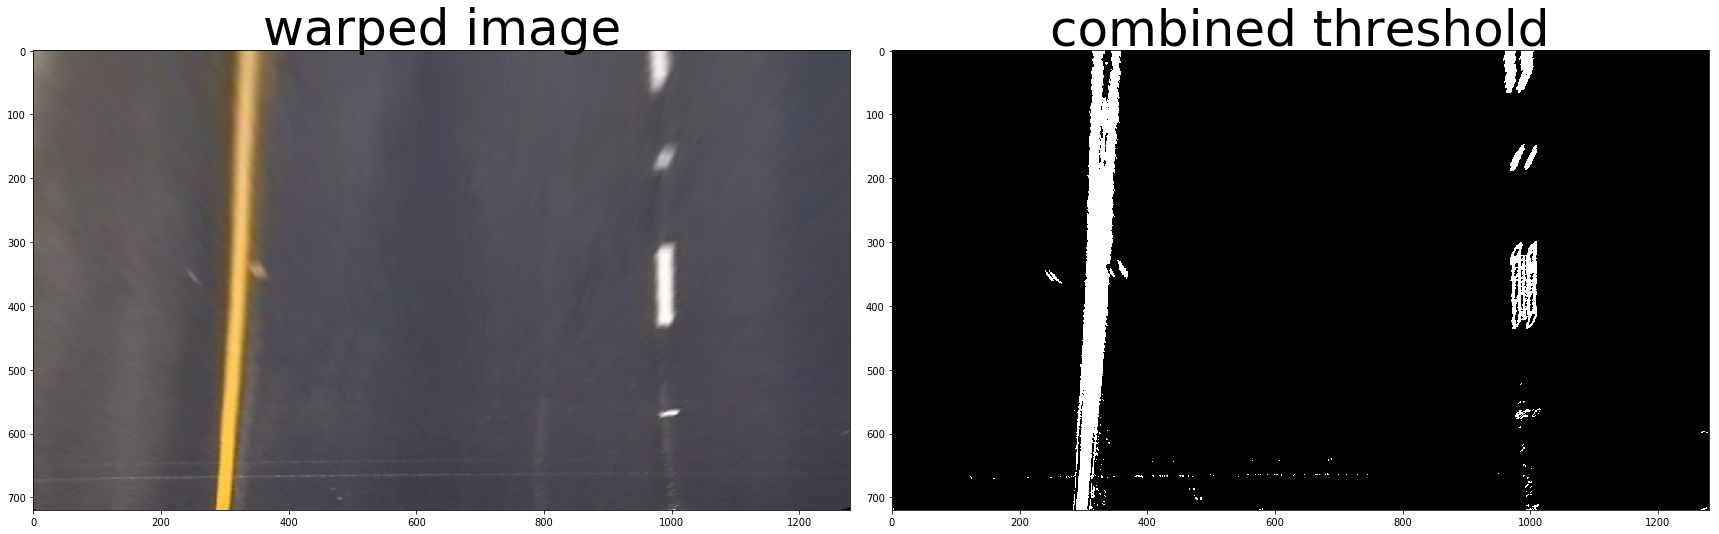

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
ksize = 3
gradx = abs_sobel_thresh(warp_ex_img, orient='x',thresh_min=20,thresh_max=100)
grady = abs_sobel_thresh(warp_ex_img, orient='y',thresh_min=20, thresh_max=100)
mag_binary = mag_thresh(warp_ex_img, sobel_kernel=ksize, mag_thresh=(0, 255))
dir_binary = dir_threshold(warp_ex_img, sobel_kernel=ksize, thresh=(0, np.pi/2))
hls_binary = hls_select(warp_ex_img,thresh=(170,255))

combined = np.zeros_like(gradx)
combined[((hls_binary==1)&(dir_binary==1)|(gradx==1))]=1

f, (ax1, ax2) = plt.subplots(1,2, figsize=(24,9))
f.tight_layout()
plt.figure()
ax1.imshow(warp_ex_img)
ax1.set_title('warped image', fontsize=50)
plt.figure()
ax2.imshow(combined, cmap='gray')
ax2.set_title('combined threshold', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

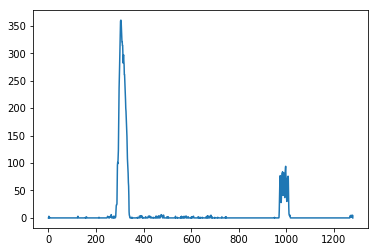

In [12]:
histogram = np.sum(combined[combined.shape[0]//2:,:], axis=0)
plt.plot(histogram)

In [13]:
def sliding_window(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 70
    # Set minimum number of pixels found to recenter window
    minpix = 100

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    #print('length of nonzeroy: ',len(nonzeroy))
    nonzerox = np.array(nonzero[1])
    #print('length of nonzerox: ',len(nonzerox))
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        
        win_xleft_low = leftx_current-margin  
        win_xleft_high = leftx_current+margin  
        win_xright_low = rightx_current-margin  
        win_xright_high = rightx_current+margin  
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        
        good_left_inds = ((nonzeroy>=win_y_low)&(nonzeroy<=win_y_high)&(nonzerox>=win_xleft_low)&(nonzerox<=win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img

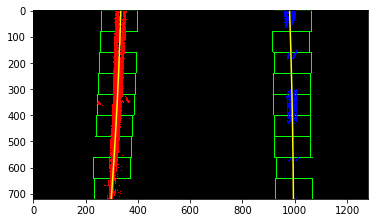

In [14]:
def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = sliding_window(binary_warped)

    ### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
    left_fit = np.polyfit(lefty,leftx,2)
    right_fit = np.polyfit(righty,rightx,2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return out_img


out_img = fit_polynomial(combined)

plt.imshow(out_img)

In [18]:
def pipeline(image):
    udist = undistort(image)
    warped, M, Minv = warp(udist)
    ksize = 3
    gradx = abs_sobel_thresh(warped, orient='x',thresh_min=20,thresh_max=100)

    dir_binary = dir_threshold(warped, sobel_kernel=ksize, thresh=(0.5, np.pi/2))
    hls_binary = hls_select(warped,thresh=(170,255))

    combined = np.zeros_like(gradx)
    combined[((hls_binary==1)&(dir_binary==1)|(gradx==1))]=1
    left_i, right_i = [],[]
    if pipeline.count==0:
        leftx,lefty,rightx,righty,outimg = sliding_window(combined)
        left_fit = np.polyfit(lefty,leftx,2)
        right_fit = np.polyfit(righty,rightx,2)
        pipeline.left_fit = left_fit
        pipeline.right_fit = right_fit
    else:
        left_fit = pipeline.left_fit
        right_fit = pipeline.right_fit
        nonzero = combined.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        margin = 70
        
        left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 

        right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))   
        
        if len(left_lane_inds)+len(right_lane_inds)<31000:
            pipeline.count =0
        
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds]
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx,2)
        
    left_i.append(left_fit)
    right_i.append(right_fit)
    if len(left_i)>=9:
        left_fit = np.mean(left_i[-1:-8:-1])
        right_fit = np.mean(right_i[-1:-8:-1])
        
    ploty = np.linspace(0,combined.shape[0]-1,combined.shape[0])
    left_fitx = left_fit[0]*(ploty**2)+left_fit[1]*ploty+left_fit[2]
    right_fitx = right_fit[0]*(ploty**2)+right_fit[1]*ploty+right_fit[2]
    
    
    combined_zero = np.zeros_like(combined).astype(np.uint8)
    color_combined = np.dstack((combined_zero, combined_zero, combined_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_combined, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_combined, Minv, (color_combined.shape[1], color_combined.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(udist, 1, newwarp, 0.3, 0)
    #plt.imshow(result)
    
    y_eval = np.max(ploty)
    ym_per_pix = 30/720
    xm_per_pix = 3.7/700
    left_fit_cr = np.polyfit(lefty*ym_per_pix,leftx*xm_per_pix,2)
    right_fit_cr = np.polyfit(righty*ym_per_pix,rightx*xm_per_pix,2)
    
    #Finding Radius of curvature of the lanes
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    rad = np.mean((left_curverad,right_curverad))
    
    
    midpoint = np.mean((left_fit[0]*(y_eval**2)+left_fit[1]*y_eval+left_fit[2],right_fit[0]*(y_eval**2)+right_fit[1]*y_eval+right_fit[2]))
    
    image_text = np.copy(result)
    
    cv2.putText(image_text, text='Curve Radius={0:.2f} m'.format(rad), org=(200,100),fontFace=3, fontScale=1, color=(255,255,255), thickness=3)
    
    # finding offset of camera
    camera = (midpoint-700)*xm_per_pix 
    if camera<=0:
        T = "left"
    else: 
        T = "right"
   
    # Inserting text with distance from center
    cv2.putText(image_text, text="Distance from center={0:.2f} m {1:}".format(abs(camera),T), org=(200,150),fontFace=3, fontScale=1, color=(255,255,255), thickness=3)

    return image_text

pipeline.count = 0
pipeline.left_fit = []
pipeline.right_fit = []
    

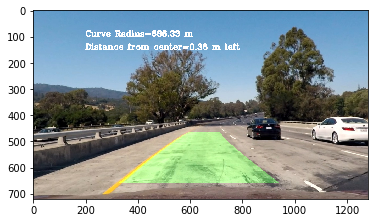

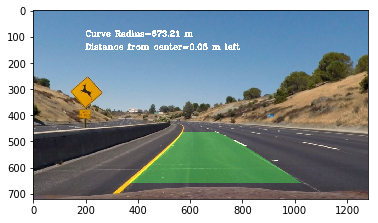

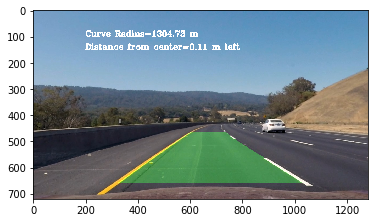

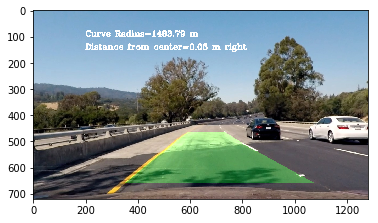

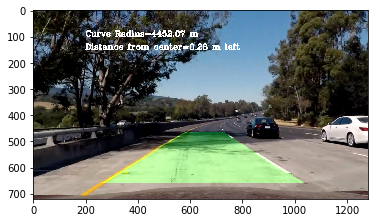

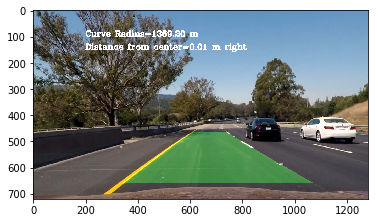

In [37]:
test_images = glob.glob('test_images/test*.jpg')
i = 0
#f, axis = plof, axs = plt.subplots(6,2, figsize =(24,9))
#axis = axis.ravel()
output =[]
for image in test_images:
    image = cv2.imread(image)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    out = pipeline(image)
    output.append(out)

for i in range(6):
    cv2.imwrite('output_images/test_out'+str(i)+'.jpg',cv2.cvtColor(output[i],cv2.COLOR_RGB2BGR))
    plt.figure()
    plt.imshow(output[i])

    

In [20]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
final = 'adv_lane_project.mp4'
clip1 = VideoFileClip('project_video.mp4')
clip = clip1.fl_image(pipeline)
%time clip.write_videofile(final, audio=False) 

[MoviePy] >>>> Building video adv_lane_project.mp4
[MoviePy] Writing video adv_lane_project.mp4


100%|█████████████████████████████████████▉| 1260/1261 [07:12<00:00,  2.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: adv_lane_project.mp4 

Wall time: 7min 14s


In [10]:
import numpy as np
import random

###############################################################################
### make the toy dataset
random.seed(42)
grade = [random.random() for ii in range(0,n_points)]
bumpy = [random.random() for ii in range(0,n_points)]
error = [random.random() for ii in range(0,n_points)]
y = np.array([round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)])
for ii in range(0, len(y)):
    if grade[ii]>0.8 or bumpy[ii]>0.8:
        y[ii] = 1.0
print(y.shape)
### split into train/test sets
X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
split = int(0.75*n_points)
X_train = X[0:split]
X_test  = X[split:]
y_train = y[0:split]
y_test  = y[split:]

grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
print(grade_sig)

(1000,)
[0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.08693883262941615, 0.029797219438070344, 0.21863797480360336, 0.026535969683863625, 0.1988376506866485, 0.5449414806032167, 0.2204406220406967, 0.006498759678061017, 0.15547949981178155, 0.09274584338014791, 0.6037260313668911, 0.7297317866938179, 0.3785343772083535, 0.577352145256762, 0.045824383655662215, 0.22789827565154686, 0.0797919769236275, 0.23279088636103018, 0.10100142940972912, 0.36483217897008424, 0.6091310056669882, 0.171138648198097, 0.1634024937619284, 0.6399997598540929, 0.5569497437746462, 0.22904807196410437, 0.03210024390403776, 0.3154530480590819, 0.21098284358632646, 0.3146778807984779, 0.24662750769398345, 0.26274160852293527, 0.21932075915728333, 0.09090941217379389, 0.04711637542473457, 0.62744604170309, 0.42215996679968404, 0.06352770615195713, 0.011481021942819636, 0.7207218193601946, 0.11155217359587644, 0.26338905075109076, 0.17865188053013137, 0.2984447914486329, 0.0005718961279435053